<a href="https://colab.research.google.com/github/jannat0718/Tensorflow-Tutorial/blob/main/TensorFlow_Tutorial_6_RNNs%2C_GRUs%2C_LSTMs_and_Bidirectionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

2.8.0


In [ ]:
#Load data
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train.shape,X_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

In [ ]:
#Change precision and rescale
X_train=X_train.astype("float32")/255.0
X_test=X_test.astype("float32")/255.0

#RNN using Sequential api

In [ ]:
model_rnn=keras.Sequential()
model_rnn.add(keras.Input(shape=(None,28)))# timestep=28
model_rnn.add(
    layers.SimpleRNN(512,return_sequences=True,activation='relu',name='Rnn_1')# For each timesteps would return 512 sequences
)
model_rnn.add(layers.SimpleRNN(512, activation='relu',name='Rnn_2'))
model_rnn.add(layers.Dense(10,name='Output_layer'))
print(model_rnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Rnn_1 (SimpleRNN)           (None, None, 512)         276992    
                                                                 
 Rnn_2 (SimpleRNN)           (None, 512)               524800    
                                                                 
 Output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 806,922
Trainable params: 806,922
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_rnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

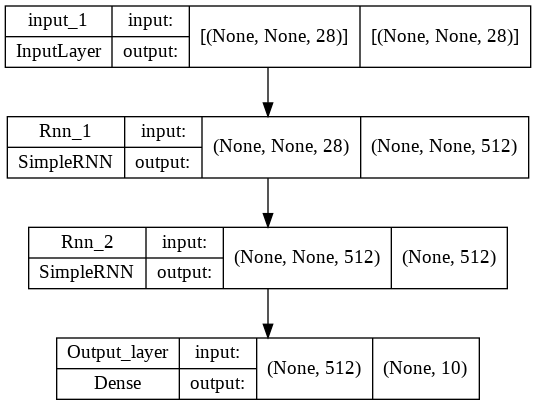

In [ ]:
#Plot the model
keras.utils.plot_model(model_rnn,'RNN_model.png',show_shapes=True)

In [ ]:
history_rnn=model_rnn.fit(X_train,Y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2,shuffle=True)

Epoch 1/10
750/750 [==============================] - 49s 59ms/step - loss: 0.3453 - accuracy: 0.8907 - val_loss: 0.1477 - val_accuracy: 0.9593
Epoch 2/10
750/750 [==============================] - 42s 56ms/step - loss: 0.1466 - accuracy: 0.9585 - val_loss: 0.1311 - val_accuracy: 0.9633
Epoch 3/10
750/750 [==============================] - 40s 54ms/step - loss: 0.1229 - accuracy: 0.9664 - val_loss: 0.1035 - val_accuracy: 0.9736
Epoch 4/10
750/750 [==============================] - 38s 50ms/step - loss: 0.1053 - accuracy: 0.9716 - val_loss: 0.1232 - val_accuracy: 0.9678
Epoch 5/10
750/750 [==============================] - 38s 51ms/step - loss: 0.0995 - accuracy: 0.9736 - val_loss: 0.0863 - val_accuracy: 0.9768
Epoch 6/10
750/750 [==============================] - 41s 55ms/step - loss: 0.0834 - accuracy: 0.9769 - val_loss: 0.1018 - val_accuracy: 0.9724
Epoch 7/10
750/750 [==============================] - 39s 52ms/step - loss: 0.0856 - accuracy: 0.9764 - val_loss: 0.0876 - val_accuracy:

In [ ]:
results_rnn=model_rnn.evaluate(X_test,Y_test,batch_size=64,verbose=2)
print('Test Loss','Test Accuracy:',results_rnn)

157/157 - 2s - loss: 0.0690 - accuracy: 0.9818 - 2s/epoch - 10ms/step
Test Loss Test Accuracy: [0.06902014464139938, 0.9818000197410583]


#Simple GRU using Sequential api

In [ ]:
model_gru=keras.Sequential()
model_gru.add(keras.Input(shape=(None,28)))# timestep=28
model_gru.add(
    layers.GRU(256,return_sequences=True,activation='tanh',name='GRU_1')# For each timesteps would return 512 sequences
)
model_gru.add(layers.GRU(256, activation='tanh',name='GRU_2'))
model_gru.add(layers.Dense(10,name='Output_layer'))
print(model_gru.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU_1 (GRU)                 (None, None, 256)         219648    
                                                                 
 GRU_2 (GRU)                 (None, 256)               394752    
                                                                 
 Output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 616,970
Trainable params: 616,970
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_gru.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

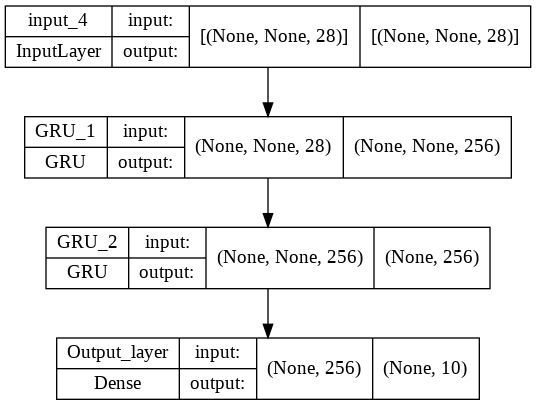

In [ ]:
#Plot the model
keras.utils.plot_model(model_gru,'GRU_model.png',show_shapes=True)

In [ ]:
history_gru=model_gru.fit(X_train,Y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2,shuffle=True)

Epoch 1/10
750/750 [==============================] - 29s 32ms/step - loss: 0.3139 - accuracy: 0.8958 - val_loss: 0.0935 - val_accuracy: 0.9693
Epoch 2/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0786 - accuracy: 0.9762 - val_loss: 0.0604 - val_accuracy: 0.9814
Epoch 3/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0533 - accuracy: 0.9830 - val_loss: 0.0568 - val_accuracy: 0.9838
Epoch 4/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0486 - val_accuracy: 0.9877
Epoch 5/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.0454 - val_accuracy: 0.9864
Epoch 6/10
750/750 [==============================] - 23s 31ms/step - loss: 0.0262 - accuracy: 0.9920 - val_loss: 0.0560 - val_accuracy: 0.9845
Epoch 7/10
750/750 [==============================] - 23s 30ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0391 - val_accuracy:

In [ ]:
results_gru=model_gru.evaluate(X_test,Y_test,batch_size=64,verbose=2)
print('Test Loss','Test Accuracy:',results_gru)

157/157 - 1s - loss: 0.0322 - accuracy: 0.9904 - 1s/epoch - 9ms/step
Test Loss Test Accuracy: [0.03222988545894623, 0.9904000163078308]


#LSTM 

In [ ]:
model_lstm=keras.Sequential()
model_lstm.add(keras.Input(shape=(None,28)))# timestep=28
model_lstm.add(
    layers.LSTM(256,return_sequences=True,activation='tanh',name='LSTM_1')# For each timesteps would return 512 sequences
)
model_lstm.add(layers.LSTM(256, activation='tanh',name='LSTM_2'))
model_lstm.add(layers.Dense(10,name='Output_layer'))
print(model_lstm.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_1 (LSTM)               (None, None, 256)         291840    
                                                                 
 LSTM_2 (LSTM)               (None, 256)               525312    
                                                                 
 Output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_lstm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

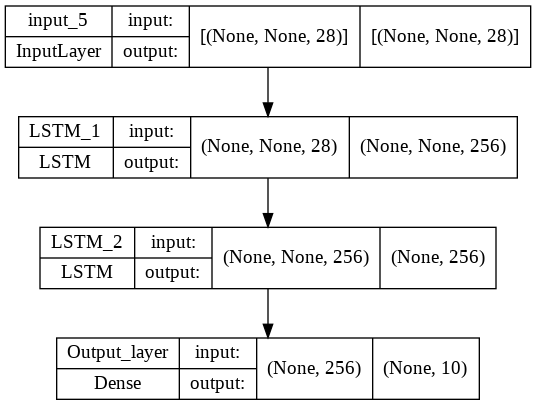

In [ ]:
#Plot the model
keras.utils.plot_model(model_lstm,'LSTM_model.png',show_shapes=True)

In [ ]:
history_lstm=model_lstm.fit(X_train,Y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2,shuffle=True)

Epoch 1/10
750/750 [==============================] - 24s 28ms/step - loss: 0.3466 - accuracy: 0.8866 - val_loss: 0.1088 - val_accuracy: 0.9667
Epoch 2/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0964 - accuracy: 0.9705 - val_loss: 0.0763 - val_accuracy: 0.9762
Epoch 3/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0692 - accuracy: 0.9778 - val_loss: 0.0739 - val_accuracy: 0.9761
Epoch 4/10
750/750 [==============================] - 19s 26ms/step - loss: 0.0557 - accuracy: 0.9827 - val_loss: 0.0546 - val_accuracy: 0.9834
Epoch 5/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0558 - val_accuracy: 0.9842
Epoch 6/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0321 - accuracy: 0.9896 - val_loss: 0.0519 - val_accuracy: 0.9838
Epoch 7/10
750/750 [==============================] - 18s 24ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0512 - val_accuracy:

In [ ]:
results_lstm=model_lstm.evaluate(X_test,Y_test,batch_size=64,verbose=2)
print('Test Loss','Test Accuracy:',results_lstm)

157/157 - 1s - loss: 0.0490 - accuracy: 0.9857 - 1s/epoch - 9ms/step
Test Loss Test Accuracy: [0.04898914322257042, 0.9857000112533569]


#Bi-directional LSTM

In [ ]:
model_bi_lstm=keras.Sequential()
model_bi_lstm.add(keras.Input(shape=(None,28)))# timestep=28
model_bi_lstm.add(layers.Bidirectional(
    layers.LSTM(256,return_sequences=True,activation='tanh',name='BI_LSTM_1')
    ))
model_bi_lstm.add(layers.Bidirectional(
    layers.LSTM(256, activation='tanh',name='Bi_LSTM_2')
    ))
model_bi_lstm.add(layers.Dense(10,name='Output_layer'))
print(model_bi_lstm.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, None, 512)        583680    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              1574912   
 nal)                                                            
                                                                 
 Output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 2,163,722
Trainable params: 2,163,722
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_bi_lstm.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

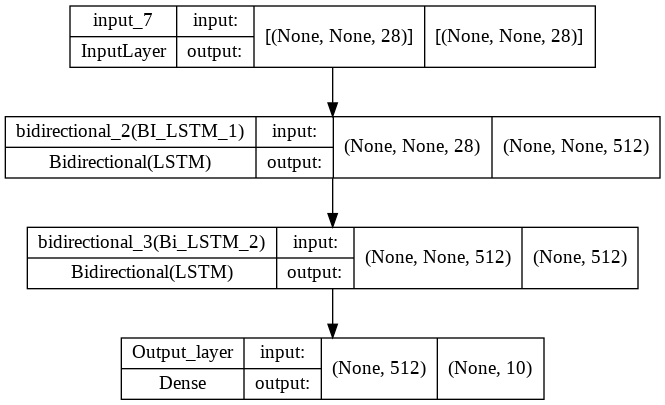

In [ ]:
#Plot the model
keras.utils.plot_model(model_bi_lstm,'Bi_directional_LSTM_model.png',show_shapes=True)

In [ ]:
history_bi_lstm=model_bi_lstm.fit(X_train,Y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2,shuffle=True)

Epoch 1/10
750/750 [==============================] - 45s 52ms/step - loss: 0.3031 - accuracy: 0.8996 - val_loss: 0.1240 - val_accuracy: 0.9622
Epoch 2/10
750/750 [==============================] - 37s 50ms/step - loss: 0.0871 - accuracy: 0.9725 - val_loss: 0.0727 - val_accuracy: 0.9769
Epoch 3/10
750/750 [==============================] - 37s 50ms/step - loss: 0.0609 - accuracy: 0.9821 - val_loss: 0.0531 - val_accuracy: 0.9838
Epoch 4/10
750/750 [==============================] - 37s 50ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0568 - val_accuracy: 0.9829
Epoch 5/10
750/750 [==============================] - 37s 50ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0609 - val_accuracy: 0.9826
Epoch 6/10
750/750 [==============================] - 37s 50ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0432 - val_accuracy: 0.9872
Epoch 7/10
750/750 [==============================] - 37s 50ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0432 - val_accuracy:

In [ ]:
results_bi_lstm=model_lstm.evaluate(X_test,Y_test,batch_size=64,verbose=2)
print('Test Loss','Test Accuracy:',results_bi_lstm)

157/157 - 1s - loss: 0.0490 - accuracy: 0.9857 - 1s/epoch - 9ms/step
Test Loss Test Accuracy: [0.04898914322257042, 0.9857000112533569]
